<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/Python_C2_07_Data_visualization_using_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to Python Course 2!**

In the previous lesson, we covered how to perform Machine learning. We also learned the syntax for writing functions. If you haven't completed these topics, please refer to L06 - Machine Learning: Classification before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L07 - Data visualization using t-SNE & UMAP](https://learn.omicslogic.com/Python/python-course-2-introduction-to-data-science-bioml/lesson/07-data-visualization-using-t-sne-and-umap), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# UMAP
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data:

The data is uniformly distributed on a Riemannian manifold;
The Riemannian metric is locally constant (or can be approximated as such);
The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

The details for the underlying mathematics can be found in the publication:
McInnes, L, Healy, J, [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/abs/1802.03426), ArXiv e-prints 1802.03426, 2018

The important thing is that you don’t need to worry about that—you can use UMAP right now for dimension reduction and visualisation as easily as a drop in replacement for scikit-learn’s t-SNE.

Documentation is available via Read the Docs.

https://pypi.org/project/umap-learn/

# **Lesson Code Breakdown**

## **1. Install umap-learn**

In [ ]:
pip install umap-learn

## **2. Load and prepare data**

In [ ]:
import os, umap
import pandas as pd

df = pd.read_csv('https://reneshbedre.github.io/assets/posts/tsne/ath_root_sub_seurat_processes.csv')
df = df.set_index(df.columns[0])
dft = df.T
dft = dft.set_index(dft.columns[0])

# check data
dft.head()

gene,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,BXL2,...,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
AT1G01070,,,,,,,,,,,,,,,,,,,,,
0.51,1.40,-0.26,-0.28,-0.24,-0.14,-0.13,-0.07,-0.29,-0.31,-0.23,...,0.61,-0.55,-0.41,-0.43,2.01,3.01,-0.24,-0.18,-0.34,1.16
-0.22,1.36,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,0.81,...,-0.48,-0.55,-0.41,-0.43,-0.24,0.89,-0.24,-0.18,-0.49,-0.68
-0.22,2.49,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,...,-0.48,-0.55,2.92,-0.43,-0.24,2.82,-0.24,-0.18,-0.49,1.60
2.24,0.82,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,...,0.91,-0.55,-0.41,-0.43,-0.24,-0.43,-0.24,-0.18,-0.49,1.95
-0.22,-0.51,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,...,-0.48,1.85,-0.41,-0.43,-0.24,-0.43,8.85,-0.18,-0.49,0.16


There are a number of parameters that can be set for the UMAP class; the major ones are as follows:

**n_neighbors:** This determines the number of neighboring points used in local approximations of manifold structure. Larger values will result in more global structure being preserved at the loss of detailed local structure. In general this parameter should often be in the range 5 to 50, with a choice of 10 to 15 being a sensible default.

**min_dist:** This controls how tightly the embedding is allowed compress points together. Larger values ensure embedded points are more evenly distributed, while smaller values allow the algorithm to optimise more accurately with regard to local structure. Sensible values are in the range 0.001 to 0.5, with 0.1 being a reasonable default.

**metric:** This determines the choice of metric used to measure distance in the input space. A wide variety of metrics are already coded, and a user defined function can be passed as long as it has been JITd by numba.

## **3. Load define and fit UMAP**

In [ ]:
# Define UMAP
brain_umap = umap.UMAP(random_state=999, n_neighbors=10, min_dist=.20)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(dft), columns = ['UMAP1','UMAP2'])

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## **4. Run DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
dbscan_m = DBSCAN(eps=1, min_samples=10).fit(embedding)

## **5. Plot UMAP**

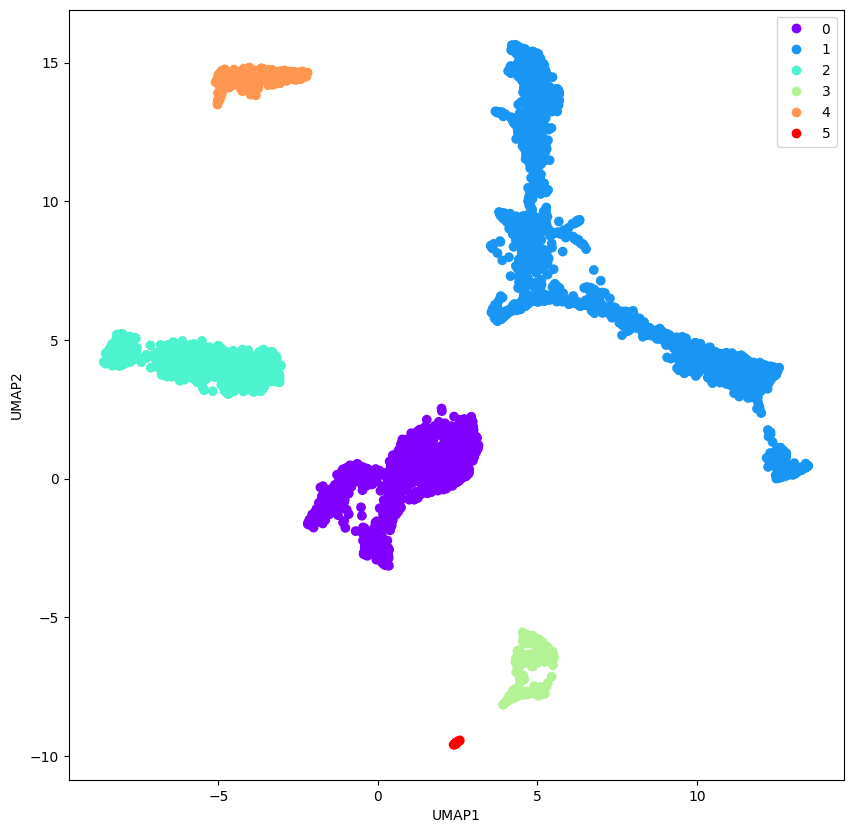

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(embedding['UMAP1'],embedding['UMAP2'], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(*scatter.legend_elements())

## **6. Optimizing DBSCAN Clustering for better Data Representation**

Now we can modify parameters to get better clustering results for DB scan or try to find a better representation of data

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


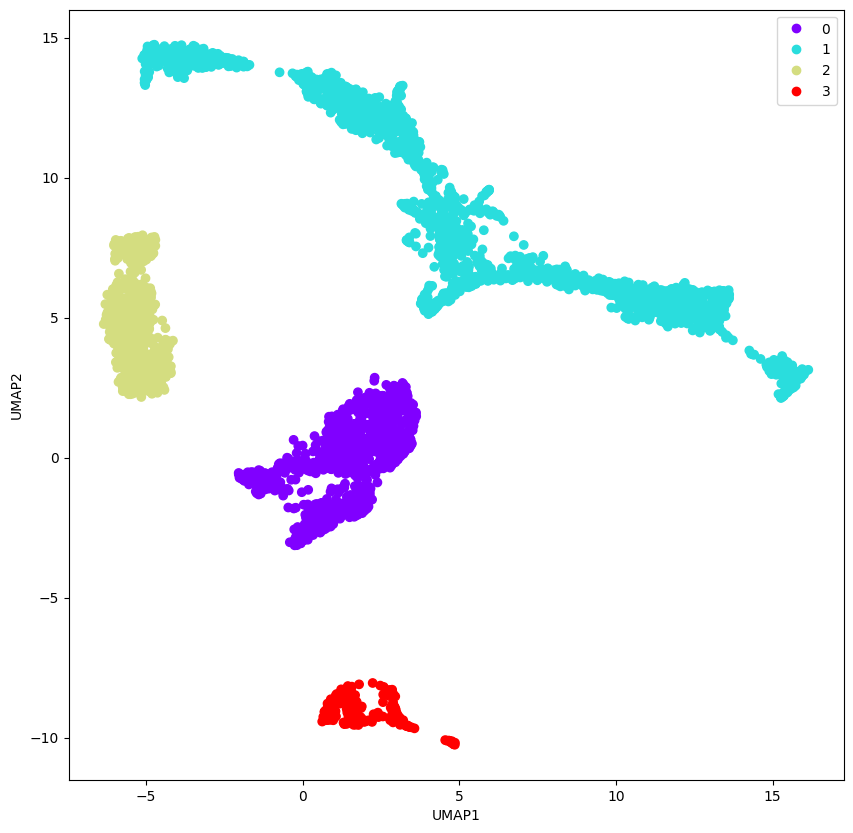

In [ ]:
# Define UMAP
#(random_state=999, n_neighbors=10, min_dist=.20)
brain_umap = umap.UMAP(random_state=999, n_neighbors=10, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(dft), columns = ['UMAP1','UMAP2'])

#Previously we used: dbscan_m = DBSCAN(eps=1, min_samples=10).fit(embedding)
#key settings are: epsilon (eps) and min_samples
dbscan_m = DBSCAN(eps=2, min_samples=10).fit(embedding)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(embedding['UMAP1'],embedding['UMAP2'], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(*scatter.legend_elements())

## **7. Simple way to plot UMAP**

In [ ]:
pip install umap-learn[plot]

<Axes: >

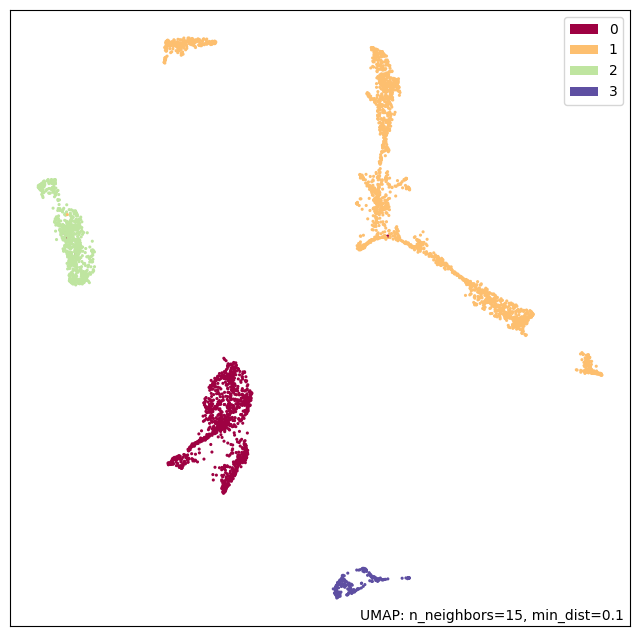

In [ ]:
#How to use UMAP plotting feature:
#make sure you install umap.plot by : pip install umap-learn[plot]

import umap.plot

mapper = umap.UMAP().fit(dft)
umap.plot.points(mapper, labels=dbscan_m.labels_)


# **Practice Codes: Try it yourself**

### **Assignment 1:**
In this assignment, you will build upon your knowledge of Data visualization using UMAP. The provided code is incomplete, with missing syntax and portions. Your task is to complete the code to successfully import data and plot UMAP . To complete this, use the following csv file: https://reneshbedre.github.io/assets/posts/tsne/ath_root_sub_seurat_processes.csv.

In [ ]:
import os, umap
import pandas as pd

df = pd.read_csv('/ath_root_sub_seurat_processes.csv')
df = df.set_index(df.columns[0])
dft = df.T
dft = dft.set_index(dft.columns[0])

# check data
dft.head()

FileNotFoundError: ignored

In [ ]:
# Define UMAP
brain_umap = umap.(random_state=999, n_neighbors=10, min_dist=.20)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(), columns = ['UMAP1','UMAP2'])

In [ ]:
from sklearn.cluster import
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
dbscan_m = DBSCAN(eps=1, min_samples=10).fit()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(fig=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(embedding[''],embedding[''], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(*scatter.legend_elements())

### **Assignment 2:**
In this assignment, you will build upon your knowledge of Data visualization using UMAP. The provided code is incomplete, with missing syntax and portions. Your task is to complete the code to successfully optimizie DBSCAN for better data representation .

In [ ]:
# Define UMAP
#(random_state=999, n_neighbors=10, min_dist=.20)
brain_umap = umap.UMAP(random_state=999, n_neighbors=10, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(), columns = ['UMAP1','UMAP2'])

#Previously we used: dbscan_m = DBSCAN(eps=1, min_samples=10).fit(embedding)
#key settings are: epsilon (eps) and min_samples
dbscan_m = DBSCAN(eps=2, min_samples=10).fit(embed)

import matplotlib.pyplot as plt

plt.figure(fig=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(embedding['UMAP1'],embedding['UMAP2'], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(*scatter.legend_elements(

### **Assignment 2:**
In this assignment, you will build upon your knowledge of Data visualization using UMAP. The provided code is incomplete, with missing syntax and portions. Your task is to complete the code to successfully plot umap using simpliest method .

In [ ]:
#How to use UMAP plotting feature:
#make sure you install umap.plot by : pip install umap-learn[plot]

import umap.

mapper = umap.UMAP().fit()
umap.plot.points(mapper, labels=dbscan_m.labels_)